# Baseline model: Logistic Regression with 5 folds cross validation
## Result: 0.848 public leaderboard

In [1]:
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 5000

In [3]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

### Load datasets

In [6]:
### Change the path to your data path
data_path = 'Datasets/'

In [7]:
%%time
train_data = pd.read_csv(data_path+'Train.csv',encoding='utf-8-sig')
test_data = pd.read_csv(data_path+'Test.csv',encoding='utf-8-sig')
#sample_submit = pd.read_csv(data_path+'SampleSubmission.csv',low_memory=False)


CPU times: user 20.8 s, sys: 942 ms, total: 21.8 s
Wall time: 21.8 s


In [8]:
train_data.rename(columns={"Accès internet": "Target"},inplace=True)

In [9]:
train_data.shape

(30558, 4043)

In [10]:
train_data.head()

ID            TypeLogmt_1         TypeLogmt_2  \
0  ID_88M0FMHZAM  Logement semi-moderne  Plusieurs logement   
1  ID_8BRUVGMYT4  Logement semi-moderne  Plusieurs logement   
2  ID_BLWKMPQSDG       Logement moderne  Plusieurs logement   
3  ID_5FF71INFJ2       Logement moderne  Plusieurs logement   
4  ID_BL1YKKNQ4Y       Logement moderne  Plusieurs logement   

                         TypeLogmt_3  \
0  Logement � un niveau (plain-pied)   
1  Logement � un niveau (plain-pied)   
2  Logement � un niveau (plain-pied)   
3  Logement ? un niveau (plain-pied)   
4  Logement � un niveau (plain-pied)   

                                       H08_Impute       H09_Impute  \
0  Electricit� (CEET) compteur dans la concession              Gaz   
1  Electricit� (CEET) compteur dans la concession              Gaz   
2  Electricit� (CEET) compteur dans la concession  Charbon de bois   
3  Electricit? (CEET) compteur dans la concession              Gaz   
4  Electricit� (CEET) compteur dans la concession  Charbon de bois   

   TAILLE_MENAGE H17A H17B H17C H17D H17E H17F H17G H17H H17I H17J H17Y H18A  \
0            1.0  Non  Oui  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui   
1            4.0  Non  Oui  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui   
2            1.0  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui  Non   
3            4.0  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui  Oui   
4            1.0  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui  Oui   

  H18B H18C H18D H18E H18F H18G H18H H18I H18J H18Y H20A H20B H20C H20D H20E  \
0  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui  Oui  Non  Non  Non   
1  Non  Non  Non  Oui  Non  Non  Non  Non  Non  Non  Oui  Non  Oui  Non  Oui   
2  Non  Non  Non  Non  Non  Non  Non  Non  Non  Oui  Non  Non  Non  Non  Non   
3  Non  Oui  Oui  Oui  Non  Non  Non  Non  Non  Non  Oui  Non  Non  Non  Non   
4  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non  Non   

  H20Y H21A H21B H21C H21D H21Y Connexion BoxLabel                  .1  \
0  Non  Non  Non  Non  Non  Oui       GVA     Box0  0.110878  0.364513   
1  Non  Non  Non  Non  Non  Oui       GVA     Box0  0.070467  0.174473   
2  Oui  Non  Non  Non  Non  Oui       GVA     Box0  0.184448  0.529424   
3  Non  Non  Non  Non  Non  Oui   Togocom     Box0  0.173134  0.488908   
4  Oui  Non  Non  Non  Non  Oui       NaN     Box0  0.166340  0.532463   

         .2        .3        .4        .5        .6        .7        .8  \
0  0.082156  0.050989  0.180205  0.440745  0.091101  0.350169  0.012656   
1  0.077245  0.009509  0.065423  0.181117  0.089368  0.513371  0.007979   
2  0.038106  0.408890  0.344663  0.368679  0.098398  0.116663  0.328337   
3  0.044793  0.299539  0.313499  0.426035  0.083545  0.120959  0.212011   
4  0.034355  0.400996  0.301856  0.404993  0.072722  0.101579  0.324310   

         .9       .10       .11       .12       .13       .14       .15  \
0  0.414666  0.115399  0.195980  0.336563  0.078171  0.100897  0.045542   
1  0.136733  0.148871  0.215091  0.277986  0.097039  0.108392  0.027131   
2  0.416548  0.443309  0.008673  0.528200  0.228227  0.311227  0.089162   
3  0.442777  0.402828  0.013082  0.485119  0.200724  0.273746  0.076230   
4  0.436339  0.435887  0.013975  0.507274  0.217213  0.290129  0.086353   

        .16       .17       .18       .19       .20       .21       .22  \
0  0.913928  0.018699  0.380138  0.607484  0.277331  0.138209  0.276000   
1  0.401973  0.002417  0.191969  0.224114  0.172935  0.127753  0.355751   
2  0.753857  0.331376  0.157631  0.465878  0.324238  0.155823  0.175883   
3  0.876149  0.223612  0.191062  0.541943  0.298798  0.165449  0.199614   
4  0.792113  0.328174  0.170184  0.524298  0.316551  0.141803  0.167701   

        .23       .24       .25       .26       .27       .28       .29  \
0  0.066287  0.258161  0.288994  0.682467  0.254205  0.464460  0.478994   
1  0.037032  0.119602  0.137235  0.309211  0.110607  0.257442  

In [11]:
ID_train = train_data.ID.values

In [12]:
ID_test = test_data.ID.values

### Drop ID 

In [13]:
train_data.drop("ID", axis=1,inplace=True)
test_data.drop("ID", axis=1,inplace=True)

### Compte the number of NaN per features 

In [14]:
Vars = list(train_data.columns)
Nan_Vars = Vars[train_data.isnull().sum().values.nonzero()[0][0]]
Nan_Vars

'Connexion'

In [15]:
train_data[Nan_Vars].value_counts(dropna=False)

NaN        10508
GVA        10420
Togocom     9630
Name: Connexion, dtype: int64

There are missing values (NaN)  in the **Connexion** feature. We will replace NaNs (10508) with *Unknown*

In [16]:
train_data["Connexion"]=train_data["Connexion"].fillna("Unknown")
test_data["Connexion"]=test_data["Connexion"].fillna("Unknown")

### Geolocalisation features

In [17]:
columns_geolocalisation = [c for c  in train_data.columns if c.startswith(' .')]+[' ']
len(columns_geolocalisation)

4000

the number of geolocalisation feature is too high, we will not use it in for the baseline model

In [18]:
train_data.drop(columns=columns_geolocalisation,axis=1,inplace=True)
test_data.drop(columns=columns_geolocalisation,axis=1,inplace=True)


In [19]:
train_data.head()

,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,H17D,H17E,H17F,H17G,H17H,H17I,H17J,H17Y,H18A,H18B,H18C,H18D,H18E,H18F,H18G,H18H,H18I,H18J,H18Y,H20A,H20B,H20C,H20D,H20E,H20Y,H21A,H21B,H21C,H21D,H21Y,Connexion,BoxLabel,Target
0,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,1.0,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Oui,GVA,Box0,0
1,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,4.0,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Oui,Non,Oui,Non,Oui,Non,Non,Non,Non,Non,Oui,GVA,Box0,1
2,Logement moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,1.0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Oui,GVA,Box0,0
3,Logement moderne,Plusieurs logement,Logement ? un niveau (plain-pied),Electricit? (CEET) compteur dans la concession,Gaz,4.0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Oui,Non,Oui,Oui,Oui,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Togocom,Box0,1
4,Logement moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,1.0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Oui,Unknown,Box0,0


### The dataset has a lot of categorical features, let's count the number of modalities per feature

In [20]:
train_data.nunique()

TypeLogmt_1       4
TypeLogmt_2       3
TypeLogmt_3       5
H08_Impute       17
H09_Impute       13
TAILLE_MENAGE    35
H17A              2
H17B              2
H17C              2
H17D              2
H17E              2
H17F              2
H17G              2
H17H              2
H17I              2
H17J              2
H17Y              2
H18A              2
H18B              2
H18C              2
H18D              2
H18E              2
H18F              2
H18G              2
H18H              2
H18I              2
H18J              2
H18Y              2
H20A              2
H20B              2
H20C              2
H20D              2
H20E              2
H20Y              2
H21A              2
H21B              2
H21C              2
H21D              2
H21Y              2
Connexion         3
BoxLabel          1
Target            2
dtype: int64

*BoxLabel* has only one level so we will delete it. 

In [21]:
train_data.drop(columns="BoxLabel",axis=1,inplace=True)
test_data.drop(columns="BoxLabel",axis=1,inplace=True)


In [22]:
train_data.shape,test_data.shape

((30558, 41), (13097, 40))

In [23]:
test_data.head()

,TypeLogmt_1,TypeLogmt_2,TypeLogmt_3,H08_Impute,H09_Impute,TAILLE_MENAGE,H17A,H17B,H17C,H17D,H17E,H17F,H17G,H17H,H17I,H17J,H17Y,H18A,H18B,H18C,H18D,H18E,H18F,H18G,H18H,H18I,H18J,H18Y,H20A,H20B,H20C,H20D,H20E,H20Y,H21A,H21B,H21C,H21D,H21Y,Connexion
0,Logement moderne,Logement unique,Logement ? plusieurs niveaux (? ?tage),Electricit? (CEET) compteur hors concession,Charbon de bois,5.0,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Togocom
1,Logement moderne,Plusieurs logement,Logement ? un niveau (plain-pied),Electricit? (CEET) compteur dans la concession,Gaz,9.0,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Oui,Non,Oui,Non,Oui,Non,Non,Non,Non,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Oui,Togocom
2,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,1.0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Oui,GVA
3,Logement semi-moderne,Logement unique,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Charbon de bois,3.0,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Oui,Unknown
4,Logement semi-moderne,Plusieurs logement,Logement � un niveau (plain-pied),Electricit� (CEET) compteur dans la concession,Gaz,3.0,Non,Non,Oui,Non,Non,Non,Oui,Non,Non,Non,Non,Oui,Non,Non,Non,Non,Non,Non,Non,Non,Non,Non,Oui,Non,Oui,Non,Oui,Non,Non,Non,Non,Non,Oui,Unknown


### Encoding for categorical feature. 
We will use One Hot Encoding for the baseline (OHE) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config


In [25]:
train_label = train_data.Target.values

In [26]:
set_config(transform_output="pandas")
Encoder = OneHotEncoder(sparse_output=False, drop="if_binary", handle_unknown="ignore")

In [27]:
Non_Encode_Colums = test_data.columns.to_list()

In [28]:
train_data = Encoder.fit_transform(train_data[Non_Encode_Colums])
test_data = Encoder.transform(test_data[Non_Encode_Colums])

/home/kodjo/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [29]:
train_data.shape, test_data.shape

((30558, 113), (13097, 113))

### Logistic regression with L2 penalisation  (Ridge)

- C is the inverse of the penalization parameter  (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

In [30]:
%%time
Cs = [0.001,0.005,0.01,0.05]

model = LogisticRegressionCV(Cs=Cs,random_state=42,cv=5,verbose=0,penalty='l2')
model.fit(train_data.values,train_label)


CPU times: user 10.7 s, sys: 13.2 s, total: 23.9 s
Wall time: 1.52 s


LogisticRegressionCV(Cs=[0.001, 0.005, 0.01, 0.05], cv=5, random_state=42)

In [31]:
## The best C value 
model.C_

array([0.05])

In [32]:
Y_train_pred_all = model.predict_proba(train_data.values)[:,1]
roc = roc_auc_score(train_label,Y_train_pred_all)
roc

0.8626242873222003

**We have 86% of AUCROC, not bad !!!**

### Final prediction 

In [33]:
Final_pred = model.predict_proba(test_data.values)[:,1]

In [34]:
Final_pred

array([0.70665405, 0.71369521, 0.70683808, ..., 0.80226874, 0.7642374 ,
       0.00394744])

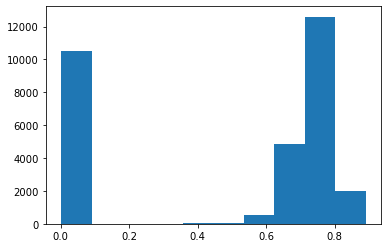

In [35]:
plt.hist(Y_train_pred_all);

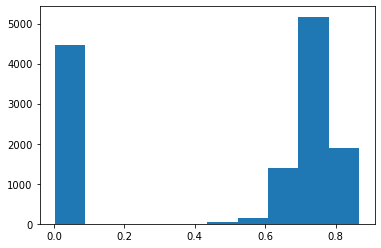

In [36]:
plt.hist(Final_pred);

### Submission 

In [38]:
# Create submission DataFrame
submission = pd.DataFrame({"ID": ID_test,
                           "Target":Final_pred})


In [40]:
submission.to_csv('Baseline_Logistic_Regression.csv', index = False)

The saved file is **Baseline_Logistic_Regression.csv**